<img src="http://certificate.tpq.io/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# EPAT Session 1

**Executive Program in Algorithmic Trading**

**_Vectorized Backtesting_**

Prof. Dr. Yves J. Hilpisch | The Python Quants GmbH | http://tpq.io

<a href="http://shop.oreilly.com/product/0636920269861.do" target="_blank"><img src="https://hilpisch.com/aiif_cover.png" width="300px" align="left" border="1px"></a>

## Basic Imports

In [1]:
import numpy as np
import pandas as pd
from pylab import plt
plt.style.use('seaborn')
pd.set_option('mode.chained_assignment', None)

## Reading Financial Data

In [2]:
#url = 'http://hilpisch.com/aiif_eikon_eod_data.csv'  # EOD data
url = 'http://hilpisch.com/aiif_eikon_id_data.csv'  # intraday data

In [3]:
raw = pd.read_csv(url, index_col=0, parse_dates=True).dropna()

In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1686 entries, 2019-03-01 15:00:00 to 2019-12-31 22:00:00
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  1686 non-null   float64
 1   MSFT.O  1686 non-null   float64
 2   INTC.O  1686 non-null   float64
 3   AMZN.O  1686 non-null   float64
 4   GS.N    1686 non-null   float64
 5   SPY     1686 non-null   float64
 6   .SPX    1686 non-null   float64
 7   .VIX    1686 non-null   float64
 8   EUR=    1686 non-null   float64
 9   XAU=    1686 non-null   float64
 10  GDX     1686 non-null   float64
 11  GLD     1686 non-null   float64
dtypes: float64(12)
memory usage: 171.2 KB


In [6]:
raw.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2019-03-01 15:00:00,174.2200,112.4800,53.64,1657.7300,200.69,280.7900,2807.02,14.11,1.1395,1308.3781,22.135,123.6200
2019-03-01 16:00:00,173.6850,112.0800,53.29,1659.4348,198.79,279.8200,2797.22,14.33,1.1384,1305.4611,22.160,123.3200
2019-03-01 17:00:00,173.3390,111.8300,52.94,1656.0000,197.68,279.1000,2789.84,14.61,1.1373,1301.2491,22.005,122.9348
2019-03-01 18:00:00,174.1901,112.3699,53.14,1662.3301,198.63,279.6800,2795.84,14.16,1.1364,1298.6105,21.925,122.6600
2019-03-01 19:00:00,174.5150,112.4500,53.08,1669.1700,197.96,279.7385,2796.37,13.91,1.1363,1296.2953,21.840,122.4650


In [6]:
raw.tail()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2019-12-31 18:00:00,292.0401,156.9050,59.620,1843.5250,229.20,320.67,3217.01,15.13,1.1227,1522.4597,29.465,143.42
2019-12-31 19:00:00,292.2057,156.9926,59.590,1845.2499,229.26,320.92,3219.38,14.33,1.1222,1520.1300,29.420,143.18
2019-12-31 20:00:00,292.3600,157.2845,59.575,1845.2200,228.92,320.94,3219.75,14.16,1.1215,1519.6451,29.400,143.12
2019-12-31 21:00:00,293.3700,157.4900,59.820,1846.9500,229.89,321.89,3230.56,13.92,1.1216,1517.3600,29.290,142.93
2019-12-31 22:00:00,293.8200,157.9000,59.990,1850.2000,229.93,322.39,3230.78,13.78,1.1210,1517.0100,29.300,142.90


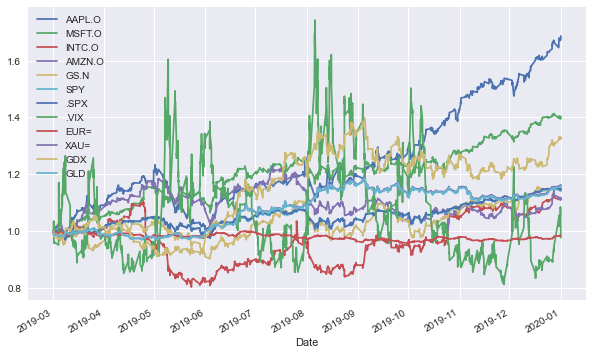

In [7]:
(raw / raw.iloc[0]).plot(figsize=(10, 6));

## Efficient Markets

In [5]:
sym = 'AAPL.O'
# sym = 'EUR='

In [6]:
data = pd.DataFrame(raw[sym])

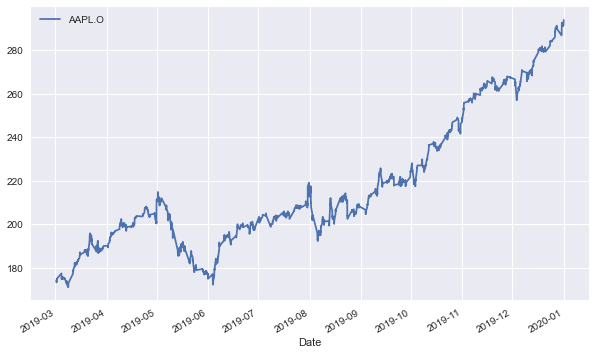

In [21]:
data.plot(figsize=(10, 6));

In [11]:
lags = 10
cols = list()
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data[sym].shift(lag)
    cols.append(col)

In [12]:
cols

['lag_1',
 'lag_2',
 'lag_3',
 'lag_4',
 'lag_5',
 'lag_6',
 'lag_7',
 'lag_8',
 'lag_9',
 'lag_10']

In [13]:
data.head(8)

,AAPL.O,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
Date,,,,,,,,,,,
2019-03-01 15:00:00,174.2200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-01 16:00:00,173.6850,174.2200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-01 17:00:00,173.3390,173.6850,174.2200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-01 18:00:00,174.1901,173.3390,173.6850,174.2200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-01 19:00:00,174.5150,174.1901,173.3390,173.6850,174.2200,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-01 20:00:00,174.9775,174.5150,174.1901,173.3390,173.6850,174.220,NaN,NaN,NaN,NaN,NaN
2019-03-01 21:00:00,174.9700,174.9775,174.5150,174.1901,173.3390,173.685,174.220,NaN,NaN,NaN,NaN
2019-03-01 22:00:00,175.0200,174.9700,174.9775,174.5150,174.1901,173.339,173.685,174.22,NaN,NaN,NaN


In [14]:
data.dropna(inplace=True)

In [15]:
reg = np.linalg.lstsq(data[cols], data[sym], rcond=-1)[0]

<BarContainer object of 10 artists>

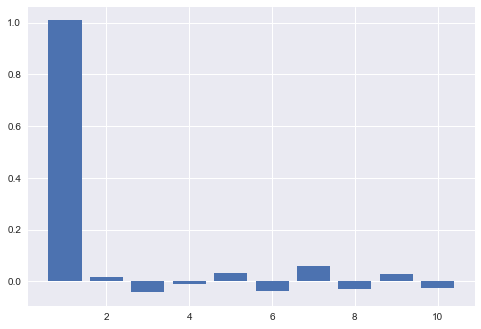

In [16]:
plt.bar(np.arange(len(reg))+1,reg)

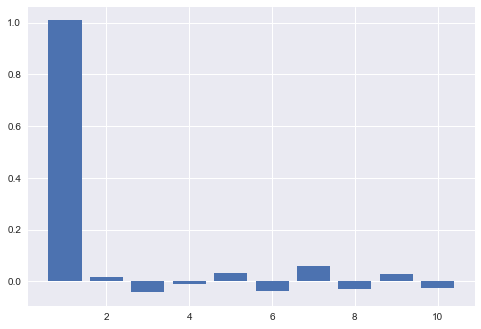

In [17]:
plt.bar(np.arange(len(reg)) + 1, reg);



### <span style ="color:green">Intresting to observe that the last price is the best price to predict the next price for both hourly and daily price</span>

```diff
- text in red
+ text in green
! text in orange
# text in gray
@@ text in purple (and bold)@@
```

## Simple Trading Strategy

In [24]:
sym = 'EUR='

In [25]:
data = pd.DataFrame(raw[sym])

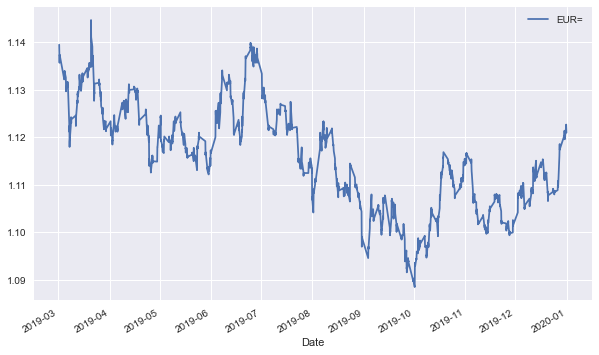

In [26]:
data.plot(figsize=(10, 6));

In [27]:
data['SMA1'] = data[sym].rolling(42).mean()

In [28]:
data['SMA2'] = data[sym].rolling(252).mean()

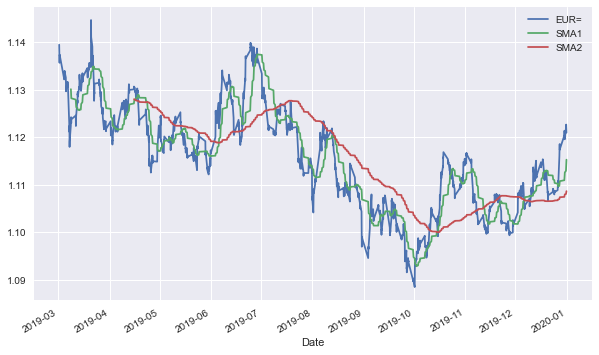

In [29]:
data.plot(figsize=(10, 6));

In [30]:
data.dropna(inplace=True)

In [31]:
# data['p'] = np.where(data['SMA1'] > data['SMA2'], 'long', 'short')
data['p'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)

In [32]:
data

,EUR=,SMA1,SMA2,p
Date,,,,
2019-04-15 17:00:00,1.1306,1.127517,1.128060,-1
2019-04-15 18:00:00,1.1302,1.127614,1.128023,-1
2019-04-15 19:00:00,1.1302,1.127702,1.127991,-1
2019-04-15 20:00:00,1.1306,1.127805,1.127964,-1
2019-04-15 21:00:00,1.1306,1.127914,1.127941,-1
...,...,...,...,...
2019-12-31 18:00:00,1.1227,1.114067,1.108348,1
2019-12-31 19:00:00,1.1222,1.114410,1.108435,1
2019-12-31 20:00:00,1.1215,1.114719,1.108522,1


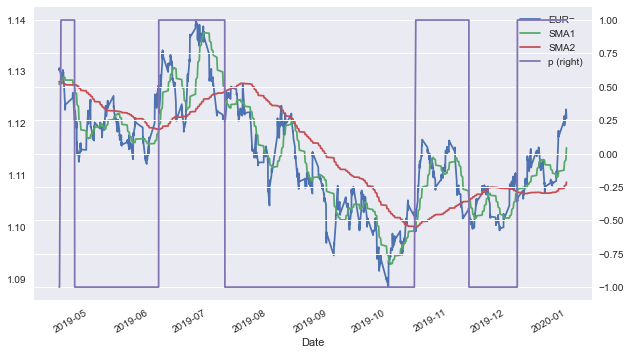

In [33]:
data.plot(secondary_y='p', figsize=(10, 6));

## Vectorized Backtesting

In [45]:
data['r'] = np.log(data[sym] / data[sym].shift(1))

In [46]:
data['r_'] = -1 * data['r']  # negative market returns

In [47]:
# np.random.choice?

In [48]:
data['rn'] = np.random.choice([1, -1], size=len(data)) * data['r']

In [49]:
data['s'] = data['r'] * data['p'].shift(1)

In [50]:
data

,EUR=,SMA1,SMA2,p,r,r_,rn,s
Date,,,,,,,,
2019-04-15 17:00:00,1.1306,1.127517,1.128060,-1,NaN,NaN,NaN,NaN
2019-04-15 18:00:00,1.1302,1.127614,1.128023,-1,-0.000354,0.000354,-0.000354,0.000354
2019-04-15 19:00:00,1.1302,1.127702,1.127991,-1,0.000000,-0.000000,-0.000000,-0.000000
2019-04-15 20:00:00,1.1306,1.127805,1.127964,-1,0.000354,-0.000354,-0.000354,-0.000354
2019-04-15 21:00:00,1.1306,1.127914,1.127941,-1,0.000000,-0.000000,-0.000000,-0.000000
...,...,...,...,...,...,...,...,...
2019-12-31 18:00:00,1.1227,1.114067,1.108348,1,0.000178,-0.000178,0.000178,0.000178
2019-12-31 19:00:00,1.1222,1.114410,1.108435,1,-0.000445,0.000445,0.000445,-0.000445
2019-12-31 20:00:00,1.1215,1.114719,1.108522,1,-0.000624,0.000624,0.000624,-0.000624


In [51]:
data[['r', 'r_', 'rn', 's']].sum()  # sum of log returns

r    -0.008527
r_    0.008527
rn   -0.041879
s     0.024443
dtype: float64

In [60]:
#pd.DataFrame().agg()
data[['r','r_', 'rn', 's']].sum().agg(func = np.exp,axis =0)  # gross performance

r     0.991509
r_    1.008564
rn    0.958986
s     1.024744
dtype: float64

In [61]:
data[['r', 'r_', 'rn', 's']].sum().apply(np.exp) - 1  # net performance

r    -0.008491
r_    0.008564
rn   -0.041014
s     0.024744
dtype: float64

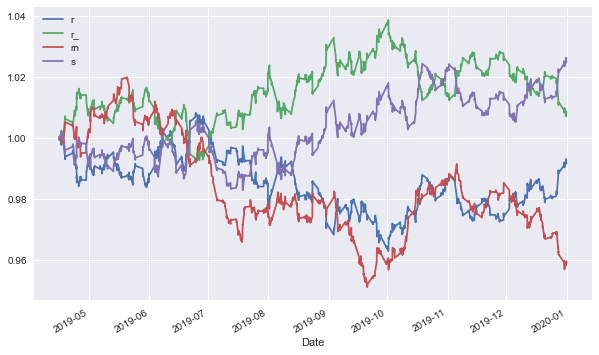

In [62]:
data[['r', 'r_', 'rn', 's']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6));  # gross performance over time

## Advanced Trading Strategy

### Data Preprocessing

In [5]:
sym = 'EUR='

In [6]:
data = pd.DataFrame(raw[sym])

In [7]:
data['r'] = np.log(data[sym] / data[sym].shift(1))

In [8]:
data.dropna(inplace=True)

In [9]:
data['d'] = np.sign(data['r'])
data['d'] = data['d'].astype(int)

In [11]:
data

,EUR=,r,d
Date,,,
2019-03-01 16:00:00,1.1384,-0.000966,-1
2019-03-01 17:00:00,1.1373,-0.000967,-1
2019-03-01 18:00:00,1.1364,-0.000792,-1
2019-03-01 19:00:00,1.1363,-0.000088,-1
2019-03-01 20:00:00,1.1357,-0.000528,-1
...,...,...,...
2019-12-31 18:00:00,1.1227,0.000178,1
2019-12-31 19:00:00,1.1222,-0.000445,-1
2019-12-31 20:00:00,1.1215,-0.000624,-1


In [12]:
data['r_norm'] = (data['r'] - data['r'].mean()) / data['r'].std()

In [10]:
lags = 10
cols = list()
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['d'].shift(lag)
    cols.append(col)
data.dropna(inplace=True)
# data[cols] = data[cols].astype(int)

KeyError: 'd'

In [52]:
# 2 ** lags

In [53]:
data

,EUR=,r,d,r_norm,lag_1,lag_2,lag_3,lag_4,lag_5,p,s,r_,rn,lag_6,lag_7,lag_8,lag_9,lag_10
Date,,,,,,,,,,,,,,,,,,
2019-03-05 15:00:00,1.1326,-0.001059,-1,-0.980213,-1.0,1.0,1.0,-1.0,1.0,-1,0.001059,0.001059,-0.001059,1.0,-1.0,-1.0,1.0,1.0
2019-03-05 16:00:00,1.1306,-0.001767,-1,-1.642070,-1.0,-1.0,1.0,1.0,-1.0,1,-0.001767,0.001767,-0.001767,1.0,1.0,-1.0,-1.0,1.0
2019-03-05 17:00:00,1.1297,-0.000796,-1,-0.734893,-1.0,-1.0,-1.0,1.0,1.0,1,-0.000796,0.000796,-0.000796,-1.0,1.0,1.0,-1.0,-1.0
2019-03-05 18:00:00,1.1297,0.000000,0,0.009075,-1.0,-1.0,-1.0,-1.0,1.0,1,0.000000,-0.000000,-0.000000,1.0,-1.0,1.0,1.0,-1.0
2019-03-05 19:00:00,1.1305,0.000708,1,0.670410,0.0,-1.0,-1.0,-1.0,-1.0,1,0.000708,-0.000708,0.000708,1.0,1.0,-1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 18:00:00,1.1227,0.000178,1,0.175513,1.0,1.0,1.0,1.0,-1.0,-1,-0.000178,-0.000178,0.000178,-1.0,-1.0,-1.0,1.0,-1.0
2019-12-31 19:00:00,1.1222,-0.000445,-1,-0.407076,1.0,1.0,1.0,1.0,1.0,-1,0.000445,0.000445,-0.000445,-1.0,-1.0,-1.0,-1.0,1.0
2019-12-31 20:00:00,1.1215,-0.000624,-1,-0.573848,-1.0,1.0,1.0,1.0,1.0,-1,0.000624,0.000624,-0.000624,1.0,-1.0,-1.0,-1.0,-1.0


### Model Fitting (In-Sample)

In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [55]:
model = GaussianNB()
model

GaussianNB()

In [40]:
model = LogisticRegression()
model

LogisticRegression()

In [76]:
model = MLPClassifier(hidden_layer_sizes=[32], shuffle=False, max_iter=500)
model

MLPClassifier(hidden_layer_sizes=[32], max_iter=500, shuffle=False)

In [77]:
model.fit(data[cols], data['d'])

C:\Users\ramsu\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(hidden_layer_sizes=[32], max_iter=500, shuffle=False)

### Vectorized Backtesting (In-Sample)

In [78]:
data['p'] = model.predict(data[cols])

In [79]:
model.classes_

array([-1,  0,  1])

In [80]:
model.predict_proba(data[cols])

array([[0.55435189, 0.02118156, 0.42446656],
       [0.38262951, 0.05570469, 0.5616658 ],
       [0.69671194, 0.0464934 , 0.25679466],
       ...,
       [0.26841625, 0.10407549, 0.62750826],
       [0.23559079, 0.06715517, 0.69725405],
       [0.62476753, 0.02558157, 0.3496509 ]])

In [81]:
data.tail()

,EUR=,r,d,r_norm,lag_1,lag_2,lag_3,lag_4,lag_5,p,s,r_,rn,lag_6,lag_7,lag_8,lag_9,lag_10
Date,,,,,,,,,,,,,,,,,,
2019-12-31 18:00:00,1.1227,0.000178,1,0.175513,1.0,1.0,1.0,1.0,-1.0,1,-0.000178,-0.000178,0.000178,-1.0,-1.0,-1.0,1.0,-1.0
2019-12-31 19:00:00,1.1222,-0.000445,-1,-0.407076,1.0,1.0,1.0,1.0,1.0,-1,0.000445,0.000445,0.000445,-1.0,-1.0,-1.0,-1.0,1.0
2019-12-31 20:00:00,1.1215,-0.000624,-1,-0.573848,-1.0,1.0,1.0,1.0,1.0,1,0.000624,0.000624,0.000624,1.0,-1.0,-1.0,-1.0,-1.0
2019-12-31 21:00:00,1.1216,0.000089,1,0.092372,-1.0,-1.0,1.0,1.0,1.0,1,-0.000089,-0.000089,-0.000089,1.0,1.0,-1.0,-1.0,-1.0
2019-12-31 22:00:00,1.1210,-0.000535,-1,-0.490818,1.0,-1.0,-1.0,1.0,1.0,-1,0.000535,0.000535,0.000535,1.0,1.0,1.0,-1.0,-1.0


In [82]:
data['s'] = data['p'] * data['r']

In [83]:
data['r_'] = -1 * data['r']  # negative market returns

In [84]:
data['rn'] = np.random.choice([1, -1], size=len(data)) * data['r']  # random strategy returns

In [85]:
data[['r','r_', 'rn', 's']].sum().apply(np.exp)  # gross performance

r     0.988711
r_    1.011418
rn    1.020119
s     1.381833
dtype: float64

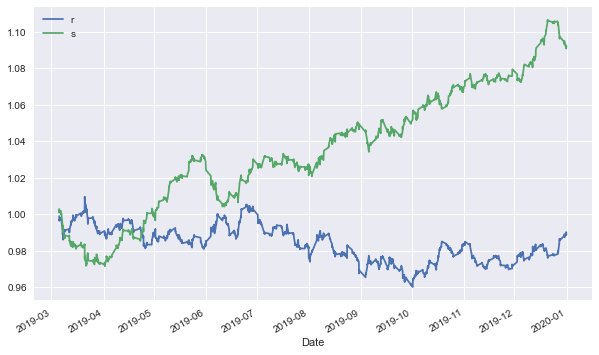

In [65]:
data[['r', 's']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6));  # gross performance over time

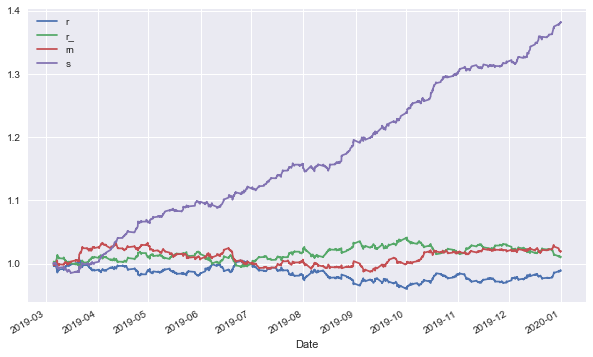

In [86]:
data[['r', 'r_', 'rn', 's']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6));  # gross performance over time

### Train-Test Split

In [87]:
split = int(len(data) * 0.7)

In [88]:
train = data.iloc[:split].copy()

In [89]:
test = data.iloc[split:].copy()

### Training (In-Sample)

In [90]:
model.fit(train[cols], train['d'])

C:\Users\ramsu\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(hidden_layer_sizes=[32], max_iter=500, shuffle=False)

In [91]:
train['p'] = model.predict(train[cols])

In [92]:
train['s'] = train['p'] * train['r']

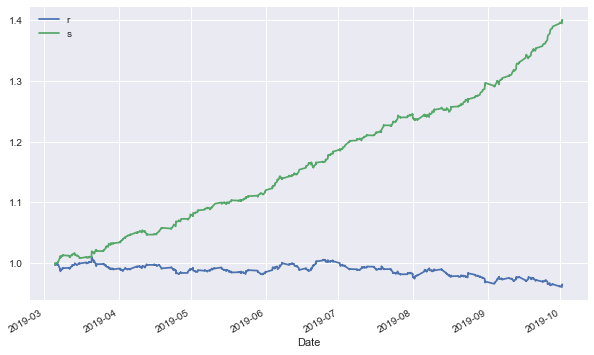

In [93]:
train[['r', 's']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6));  # gross performance over time

### Testing (Out-of-Sample)

In [94]:
test['p'] = model.predict(test[cols])

In [95]:
test['s'] = test['p'] * test['r']

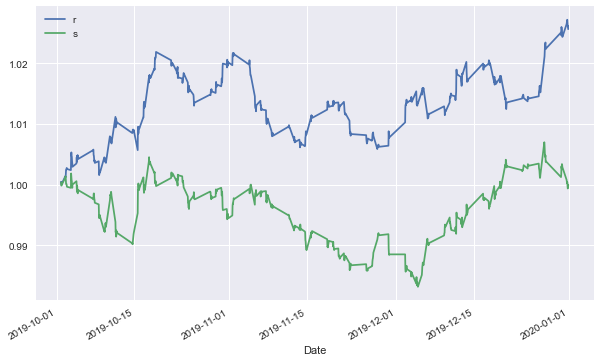

In [96]:
test[['r', 's']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6));  # gross performance over time

## Object-Oriented Implementation

In [7]:
type(data)

pandas.core.frame.DataFrame

In [14]:
data.corr()

,AAPL.O,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
AAPL.O,1.000000,0.999259,0.998507,0.997713,0.996940,0.996205,0.995460,0.994765,0.994025,0.993294,0.992515
lag_1,0.999259,1.000000,0.999256,0.998502,0.997704,0.996929,0.996191,0.995443,0.994745,0.994002,0.993268
lag_2,0.998507,0.999256,1.000000,0.999254,0.998496,0.997696,0.996917,0.996177,0.995426,0.994725,0.993979
lag_3,0.997713,0.998502,0.999254,1.000000,0.999251,0.998490,0.997687,0.996906,0.996163,0.995408,0.994704
lag_4,0.996940,0.997704,0.998496,0.999251,1.000000,0.999248,0.998485,0.997678,0.996894,0.996148,0.995391
lag_5,0.996205,0.996929,0.997696,0.998490,0.999248,1.000000,0.999245,0.998479,0.997669,0.996882,0.996134
lag_6,0.995460,0.996191,0.996917,0.997687,0.998485,0.999245,1.000000,0.999243,0.998473,0.997661,0.996870
lag_7,0.994765,0.995443,0.996177,0.996906,0.997678,0.998479,0.999243,1.000000,0.999240,0.998468,0.997652
lag_8,0.994025,0.994745,0.995426,0.996163,0.996894,0.997669,0.998473,0.999240,1.000000,0.999238,0.998462
lag_9,0.993294,0.994002,0.994725,0.995408,0.996148,0.996882,0.997661,0.998468,0.999238,1.000000,0.999235


In [ ]:
data.columns  # instance attribute

In [ ]:
data[['lag_1', 'lag_2', 'lag_3']].corr()  # method

In [ ]:
class MyClass:
    pass

In [ ]:
mc = MyClass()

In [ ]:
type(MyClass)

In [ ]:
type(mc)

In [ ]:
mc.data_attribute = 'This is an attribute.'

In [ ]:
mc.data_attribute

In [ ]:
mc.data = data

### Financial Data Class

In [ ]:
class FinancialData:
    url = 'http://hilpisch.com/aiif_eikon_eod_data.csv'
    def __init__(self, symbol):  # called during instantiation
        self.symbol = symbol  # instance attribute
        self.prepare_data()  # calls the method
    def prepare_data(self):  # instance method
        self.raw = pd.read_csv(self.url, index_col=0,
                               parse_dates=True).dropna()
        self.data = pd.DataFrame(self.raw[self.symbol])
        self.data['r'] = np.log(self.data / self.data.shift(1))
    def plot_data(self, cols=None):
        if cols is None:
            cols = [self.symbol]
        self.data[cols].plot(figsize=(10, 6))

In [ ]:
fd = FinancialData('EUR=')  # instantiation of an object

In [ ]:
fd.url  # class attribute

In [ ]:
fd.symbol  # instance attribute

In [ ]:
# fd.prepare_data()  # instance method

In [ ]:
fd.data.info()

In [ ]:
fd.plot_data()

### Vectorized Backtesting Class

In [ ]:
class SMABacktester(FinancialData):
    def prepare_statistics(self):
        self.data['SMA1'] = self.data[self.symbol].rolling(self.SMA1).mean()
        self.data['SMA2'] = self.data[self.symbol].rolling(self.SMA2).mean()
    def run_strategy(self, SMA1, SMA2):
        self.SMA1 = SMA1
        self.SMA2 = SMA2
        self.prepare_statistics()
        self.data['p'] = np.where(self.data['SMA1'] > self.data['SMA2'], 1, -1)
        self.data['s'] = self.data['p'].shift(1) * self.data['r']
        self.results = self.data.iloc[self.SMA2:].copy()
        res = self.results[['r', 's']].sum().apply(np.exp)
        return res
    def optimize_parameters(self, SMA1_range, SMA2_range):
        # simple brute force optimizations
        # might e.g. to add annualized returns for
        # better comparison
        self.ores = pd.DataFrame()
        for SMA1 in SMA1_range:
            for SMA2 in SMA2_range:
                res = self.run_strategy(SMA1, SMA2)
                self.ores = self.ores.append(pd.DataFrame(
                            {'SMA1': SMA1, 'SMA2': SMA2,
                             'BENCH': res['r'], 'STRAT': res['s'],
                            'OUTPERF': res['s'] - res['r']}, index=[0,]),
                             ignore_index=True)
        self.ores = self.ores.sort_values('STRAT', ascending=False)
        return self.ores.iloc[0]
    def plot_results(self):
        self.results[['r', 's']].cumsum().apply(np.exp).plot(figsize=(10, 6),
            title=f'{self.symbol} | SMA1={self.SMA1} | SMA2={self.SMA2}')

In [ ]:
sma = SMABacktester('GLD')

In [ ]:
sma.run_strategy(SMA1=42, SMA2=252)

In [ ]:
sma.plot_results()

In [ ]:
# BEWARE OF DATA SNOOPING & OVERFITTING THROUGHOUT!!
sma.optimize_parameters(SMA1_range=[10, 20, 30, 40],
                        SMA2_range=[150, 200, 250, 300])

In [ ]:
%%time
opt = sma.optimize_parameters(SMA1_range=range(15, 60, 2),
                        SMA2_range=range(150, 301, 5))
opt

In [ ]:
sma.ores.head()

In [ ]:
sma.run_strategy(int(opt['SMA1']), int(opt['SMA2']))

In [ ]:
sma.plot_results()

In [ ]:
# sma.results[['r', 's']].cumsum().apply(np.exp).plot(figsize=(10, 6),
#            title=f'{sma.symbol} | SMA1={sma.SMA1} | SMA2={sma.SMA2}');

In [ ]:
sma.data.head()

In [ ]:
sma.data.tail()

In [ ]:
sma.plot_data(cols=[sma.symbol, 'SMA1', 'SMA2'])

In [ ]:
sma.data[sma.SMA2 - 3:].head(6)

In [ ]:
sma.results.head()

In [ ]:
%%time
results = {}
# BEWARE OF DATA SNOOPING & OVERFITTING THROUGHOUT!!
for symbol in ['AAPL.O', 'EUR=', 'GLD']:
    sma = SMABacktester(symbol)
    opt = sma.optimize_parameters(SMA1_range=range(15, 60, 2),
                            SMA2_range=range(150, 301, 10))
    results[symbol] = opt

In [ ]:
for symbol in results.keys():
    print(symbol)
    print(results[symbol])
    print('\n')

<img src="http://certificate.tpq.io/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>